In [62]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as sp

In [108]:
t=np.loadtxt('MyTable_agus_mrm.csv',skiprows=1,delimiter=',')
ue=[]
ge=[]
re=[]
gue=[]
gre=[]

us=[]
gs=[]
rs=[]
gus=[]
grs=[]

In [109]:
for i in range(len(t)):
    if t[i,7]>=.8:
        ue.append(t[i,4])
        ge.append(t[i,5])
        re.append(t[i,6])
    if t[i,8]>=.8:
        us.append(t[i,4])
        gs.append(t[i,5])
        rs.append(t[i,6])

In [110]:
#ESTOY HACIENDO G-U

for i in range(len(ue)):
    gue.append(ge[i]-ue[i])
    gre.append(ge[i]-re[i])
for i in range(len(us)):    
    gus.append(gs[i]-us[i])
    grs.append(gs[i]-rs[i])

In [66]:
bins=np.linspace(-5,1,51)
#bins=np.linspace(-5,1,np.sqrt(len(gue)))


<function matplotlib.pyplot.show>

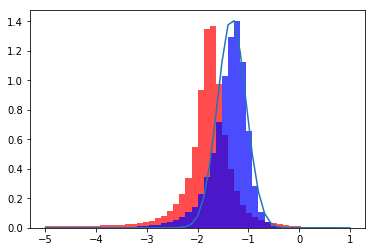

In [111]:
histgue=plt.hist(gue,bins,density='True',stacked='True',color='red',alpha=.7)
histgus=plt.hist(gus,bins,density='True',stacked='True',color='blue',alpha=.7)

#----------------------->   MODELO PROPUESTO           ¿como estimar la desv ? lo hice a ojo
plt.plot(bins,sp.norm.pdf(bins,np.median(gus),.28))   
plt.show

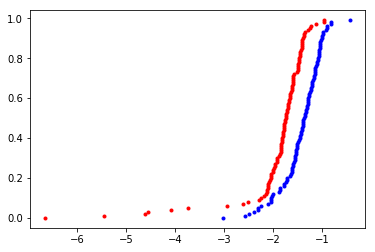

In [112]:
randgue=np.random.choice(gue,100)
randgus=np.random.choice(gus,100)

randgue=np.sort(randgue)
randgus=np.sort(randgus)

v2gus=np.arange(len(randgus))/float(len(randgus))
v2gue=np.arange(len(randgue))/float(len(randgue))
v2gus_=np.interp(randgus,randgue,v2gue)

plt.plot(randgue,v2gue,linestyle='none',marker='.',color='red')
plt.plot(randgus,v2gus,linestyle='none',marker='.',color='blue')



In [113]:
dist=(abs(v2gue-v2gus_))
np.max(dist)

0.4385450346420304

In [121]:
sp.ks_2samp(v2gus_,v2gue)

Ks_2sampResult(statistic=0.44, pvalue=3.6951229371633034e-09)

<function matplotlib.pyplot.show>

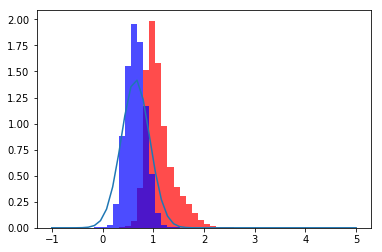

In [123]:
#PARA EL FILTRO GR
bins=np.linspace(-1,5,51)
histgue=plt.hist(gre,bins,density='True',stacked='True',color='red',alpha=.7)
histgus=plt.hist(grs,bins,density='True',stacked='True',color='blue',alpha=.7)

#----------------------->   MODELO PROPUESTO           ¿como estimar la desv ? lo hice a ojo
plt.plot(bins,sp.norm.pdf(bins,np.median(grs),.28))   
plt.show

0.4385450346420304

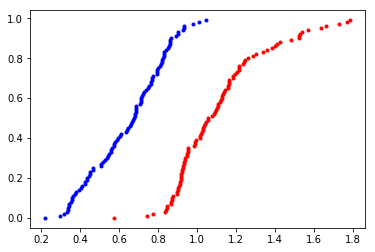

In [124]:
#PARA EL FILTRO GR
randgre=np.random.choice(gre,100)
randgrs=np.random.choice(grs,100)

randgre=np.sort(randgre)
randgrs=np.sort(randgrs)

v2grs=np.arange(len(randgrs))/float(len(randgrs))
v2gre=np.arange(len(randgre))/float(len(randgre))
v2grs_=np.interp(randgus,randgue,v2gue)

plt.plot(randgre,v2gue,linestyle='none',marker='.',color='red')
plt.plot(randgrs,v2gus,linestyle='none',marker='.',color='blue')

dist=(abs(v2gre-v2grs_))
np.max(dist)

In [125]:
sp.ks_2samp(v2grs_,v2gre)

Ks_2sampResult(statistic=0.44, pvalue=3.6951229371633034e-09)